In [1]:
%matplotlib inline
import math
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import functional as F
from d2l import torch as d2l

# 数据

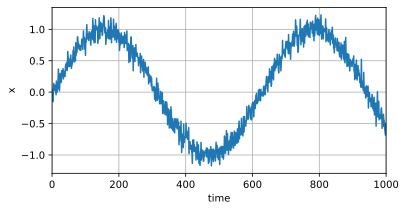

In [2]:
time = torch.arange(0, 1000)
x = torch.sin(0.01 * time) + torch.normal(0, 0.1, (1000,))
d2l.plot(time, [x], 'time', 'x', xlim=[0, 1000], figsize=(6, 3))

In [11]:
tau = 8
features = torch.zeros((1000 - tau, tau))
labels = torch.zeros((1000 - tau, 1))
for i in range(1000 - tau):
    features[i][:] = x[i: i + tau]
    labels[i] = x[i + tau]

In [12]:
batch_size = 32

train_set = TensorDataset(features, labels)
train_iter = DataLoader(train_set, batch_size, shuffle=True)
test_iter = DataLoader(train_set, batch_size, shuffle=False)

# 模型

In [17]:
model = nn.Sequential(
    nn.Linear(8, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

# 训练

In [18]:
def train(model, train_iter, loss_fn, optimizer, num_epochs):
    metrics = d2l.Accumulator(2)
    model.train()
    for epoch in range(num_epochs):
        metrics.reset()
        for x, y in train_iter:
            y_hat = model(x)
            loss = loss_fn(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            metrics.add(loss * y.numel(), y.numel())
        print(f'epoch: {epoch + 1}, loss: {metrics[0] / metrics[1]}')

In [19]:
lr = 0.01
num_epochs = 10

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

train(model, train_iter, loss_fn, optimizer, num_epochs)

epoch: 1, loss: 0.07740729188005771
epoch: 2, loss: 0.014268139347193702
epoch: 3, loss: 0.013308140314033916
epoch: 4, loss: 0.0131931135791444
epoch: 5, loss: 0.01321332493136006
epoch: 6, loss: 0.013106526371331946
epoch: 7, loss: 0.013110248221745413
epoch: 8, loss: 0.01303217294175298
epoch: 9, loss: 0.012732592576573934
epoch: 10, loss: 0.012733236435920961


# 预测

In [20]:
def predict(model, test_iter):
    model.eval()
    pred = []
    for x, _ in test_iter:
        y_hat = model(x)
        pred.extend(y_hat.detach().numpy().reshape(-1))
    return pred

In [21]:
# def predict_4_steps(model, test_iter):
#     pred = []
#     model.eval()
#     for x, _ in test_iter:
#         for _ in range(4):
#             y_hat = model(x)
#             x[:, :] = torch.cat((x[:, 1:], y_hat), dim=1)
#         pred.extend(y_hat.detach().numpy().reshape(-1))
#     return pred

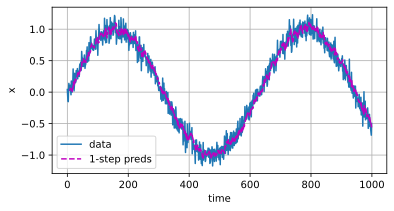

In [22]:
pred = predict(model, test_iter)
d2l.plot([time, time[tau:]], [x, pred], 'time', 'x', legend=['data', '1-step preds'], figsize=(6, 3))